<a href="https://colab.research.google.com/github/MariamKhan98/mariamkhan98/blob/main/Data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#--Define a new df column travelAlone that checks if the passenger is travelling alone.
df['travelAlone'] = np.where((df['SibSp'] + df['Parch']) > 0, 0, 1).astype('uint8')

In [ ]:
#create a new df1 with a few columns dropped. achieved by mentioning their names and axis = 1 for columns.
df1 = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis =1)

In [ ]:
# find out if there are any null values in this new df1
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0
Embarked,2
travelAlone,0


In [ ]:
# Age has 177 missing values and embarked has 2. Lets replace them.
df['Age'].fillna(df1['Age'].median(skipna=True), inplace = True)

<ipython-input-16-23592eab7b33>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df1['Age'].median(skipna=True), inplace = True)


In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,travelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
#add a dummy variable for other categorical columns with true or false values.
df_titanic = pd.get_dummies(df1, columns = ['Pclass', 'Embarked', 'Sex'], drop_first=True, dtype=np.uint8)

In [ ]:
df_titanic.head()

,Survived,Age,Fare,travelAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [ ]:
#lets create a scalar to standardize data points
#Imagine you have a table of information about Titanic passengers. You want to build a model to predict who survived.
#X represents the information the model will use to make the prediction (everything except whether they survived).
#y represents the actual answer we want the model to learn (whether they survived).
# This separation of data into features (X) and target (y) is a fundamental step
# in preparing data for machine learning. The model will use X to learn patterns
# and then try to predict y.

X = df_titanic.drop(['Survived'], axis = 1)
y = df_titanic['Survived']


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [ ]:
df_MM = trans_MM.fit_transform(X)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,1.0,0.0,0.0,1.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0,0.0
888,NaN,0.045771,0.0,0.0,1.0,0.0,1.0,0.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_SS = trans_SS.fit_transform(X)
pd.DataFrame(df_SS)

,0,1,2,3,4,5,6,7
0,-0.530377,-0.502445,-1.231645,-0.510152,0.902587,-0.307562,0.619306,0.737695
1,0.571831,0.786845,-1.231645,-0.510152,-1.107926,-0.307562,-1.614710,-1.355574
2,-0.254825,-0.488854,0.811922,-0.510152,0.902587,-0.307562,0.619306,-1.355574
3,0.365167,0.420730,-1.231645,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
4,0.365167,-0.486337,0.811922,-0.510152,0.902587,-0.307562,0.619306,0.737695
...,...,...,...,...,...,...,...,...
886,-0.185937,-0.386671,0.811922,1.960202,-1.107926,-0.307562,0.619306,0.737695
887,-0.737041,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
888,NaN,-0.176263,-1.231645,-0.510152,0.902587,-0.307562,0.619306,-1.355574
889,-0.254825,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,-1.614710,0.737695


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
X, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
train_scores, test_scores = list(), list()



In [ ]:
values = [i for i in range(1, 21)]

In [ ]:
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)

  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)

  test_scores.append(test_acc)
  train_scores.append(train_acc)
  print('>depth=%d, train=%.3f, test=%.3f' % (i, train_acc, test_acc))

>depth=1, train=0.834, test=0.842
>depth=2, train=0.851, test=0.853
>depth=3, train=0.877, test=0.871
>depth=4, train=0.901, test=0.896
>depth=5, train=0.913, test=0.904
>depth=6, train=0.931, test=0.912
>depth=7, train=0.946, test=0.921
>depth=8, train=0.961, test=0.933
>depth=9, train=0.967, test=0.937
>depth=10, train=0.974, test=0.942
>depth=11, train=0.980, test=0.938
>depth=12, train=0.985, test=0.938
>depth=13, train=0.987, test=0.941
>depth=14, train=0.990, test=0.941
>depth=15, train=0.993, test=0.934
>depth=16, train=0.995, test=0.934
>depth=17, train=0.997, test=0.937
>depth=18, train=0.998, test=0.935
>depth=19, train=0.999, test=0.932
>depth=20, train=1.000, test=0.932


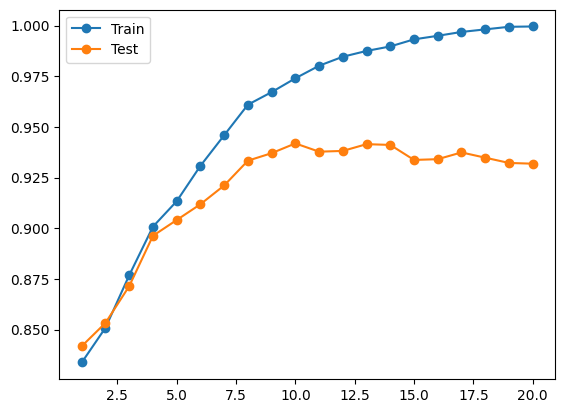

In [ ]:
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
#underfitting. on the training set its able to predict 100% but on the test it is doing poorly at 90, this shows its underfitting


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[2, 4, 6, 10, 20], 'min_samples_split': [5, 10, 20, 50, 100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

In [ ]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))


0.9717460317460317
0.9477777777777778
